<a href="https://colab.research.google.com/github/johanrosesantos/Eskwelabs-T3amSiomai-Sprints/blob/main/Sprint_1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 25.4 MB/s eta 0:00:00


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Mount GDrive's folders
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This code imports a library "os" that allows file navigation
import os
# This code sets the home directory
# Find your folder and put the path here as a string
os.chdir('/content/drive/MyDrive/Eskwelabs')

In [ ]:
df = pd.read_csv("Data/cc_clean_featureengg.csv")

In [ ]:
# Convert to pandas datetimes
df['trans_datetime'] = pd.to_datetime(df['trans_datetime'])
# Convert acct_num to int
df['acct_num'] = df['acct_num'].astype(int)
df = df.drop('acct_num2', axis=1)
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,trans_num,unix_time,category,amt,trans_datetime,age,time_of_day,season,is_holiday,age_bin
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,63.055441,afternoon,Dry,n,Baby Boomers
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,51.337440,afternoon,Dry,n,Gen X
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,68.443532,afternoon,Dry,n,Baby Boomers
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,67.972621,afternoon,Rainy,n,Baby Boomers
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",1961-07-31,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50,60.421629,afternoon,Rainy,n,Baby Boomers


In [ ]:
df.describe()

,cc_num,city_pop,acct_num,unix_time,amt,trans_datetime,age
count,9.243200e+04,9.243200e+04,9.243200e+04,9.243200e+04,92432.000000,92432,92432.000000
mean,3.757149e+17,4.533750e+05,6.046287e+11,1.609117e+09,70.214115,2020-12-28 08:59:27.019982080,66.974892
min,6.049060e+10,4.104100e+04,1.240000e+11,1.577837e+09,1.000000,2020-01-01 08:06:15,51.337440
25%,3.800000e+13,1.338930e+05,3.843000e+11,1.594429e+09,8.750000,2020-07-11 08:59:47,58.891170
50%,3.520000e+15,2.330400e+05,5.870000e+11,1.608335e+09,49.230000,2020-12-19 07:48:17,65.018480
75%,4.620000e+15,3.537670e+05,8.510000e+11,1.624330e+09,85.452500,2021-06-22 10:54:02.750000128,72.648871
max,4.830000e+18,2.308800e+07,9.964000e+11,1.638835e+09,16513.770000,2021-12-07 07:50:42,95.860370
std,1.230138e+18,1.926877e+06,2.684058e+11,1.720801e+07,178.135575,NaN,10.454150


# Exploratory Data Analysis

In [ ]:
df['trans_date'] = df['trans_datetime'].dt.date

In [ ]:
df['age'].max()

95.86036960985626

In [ ]:
# All customers have only 1 credit card in their account
df.groupby('acct_num')['cc_num'].nunique().reset_index()['cc_num'].max()

1

In [ ]:
from io import StringIO

# Create a StringIO object
csv_buffer = StringIO()

# Write DataFrame to the buffer
df.head().to_csv(csv_buffer, index=False)

# Move to the beginning of the StringIO buffer
csv_buffer.seek(0)

# Print the CSV content
print(csv_buffer.getvalue())

cc_num,gender,city,city_pop,job,dob,acct_num,trans_num,unix_time,category,amt,trans_datetime,age,time_of_day,season,is_holiday,age_bin,trans_date
676000000000.0,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,63.05544147843943,afternoon,Dry,n,Baby Boomers,2020-02-10
3520000000000000.0,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,51.337440109514034,afternoon,Dry,n,Gen X,2020-05-31
4.14e+18,M,Calapan,133893,Financial controller,1953-07-23,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,68.4435318275154,afternoon,Dry,n,Baby Boomers,2020-03-29
4720000000000000.0,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,6

In [ ]:
transdate_df = df.groupby('trans_date')['amt'].sum().to_frame().reset_index()

## Print CSV

In [ ]:
transdate_df.head()

from io import StringIO

# Create a StringIO object
csv_buffer = StringIO()

# Write DataFrame to the buffer
transdate_df.to_csv(csv_buffer, index=False)

# Move to the beginning of the StringIO buffer
csv_buffer.seek(0)

# Print the CSV content
print(csv_buffer.getvalue())

trans_date,amt
2020-01-01,3785.8
2020-01-02,3549.21
2020-01-03,8641.19
2020-01-04,11732.69
2020-01-05,7676.71
2020-01-06,6277.96
2020-01-07,3744.1
2020-01-08,5288.13
2020-01-09,5546.88
2020-01-10,5588.04
2020-01-11,7975.03
2020-01-12,5831.32
2020-01-13,3589.03
2020-01-14,4765.91
2020-01-15,2627.59
2020-01-16,4897.6
2020-01-17,5905.73
2020-01-18,10086.47
2020-01-19,8554.460000000001
2020-01-20,12929.64
2020-01-21,4592.64
2020-01-22,3813.9
2020-01-23,4028.91
2020-01-24,9217.68
2020-01-25,9232.91
2020-01-26,11004.17
2020-01-27,8235.69
2020-01-28,2261.58
2020-01-29,3594.77
2020-01-30,6269.5
2020-01-31,6665.9400000000005
2020-02-01,7825.33
2020-02-02,8643.37
2020-02-03,7460.37
2020-02-04,3369.37
2020-02-05,5556.95
2020-02-06,4590.42
2020-02-07,6902.05
2020-02-08,9547.5
2020-02-09,5859.98
2020-02-10,4284.68
2020-02-11,3988.05
2020-02-12,7326.2
2020-02-13,5338.86
2020-02-14,11293.75
2020-02-15,9538.01
2020-02-16,10916.09
2020-02-17,4551.25
2020-02-18,4441.139999999999
2020-02-19,6107.47
2020-

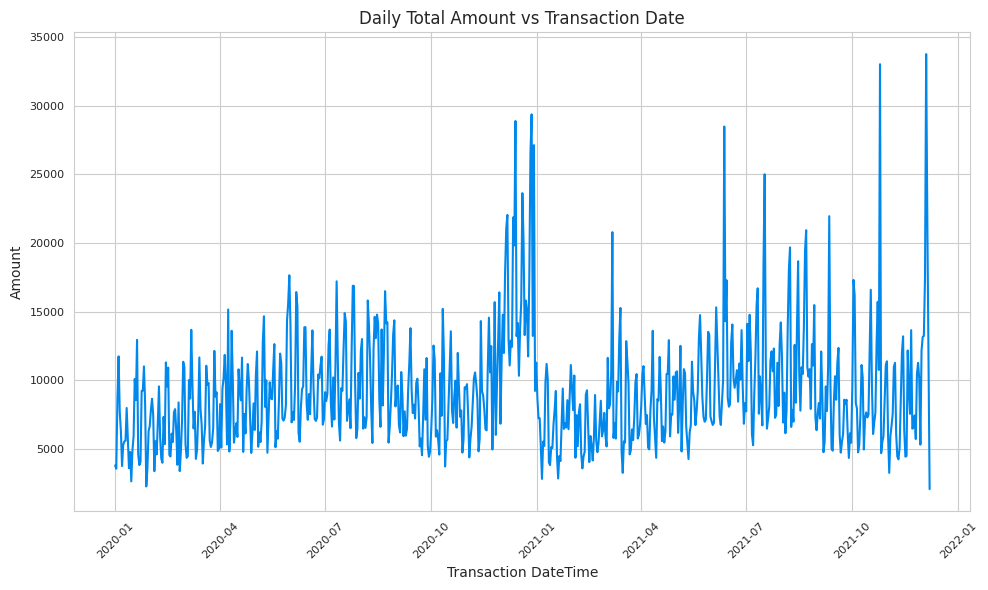

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(transdate_df['trans_date'], transdate_df['amt'], marker=None, linestyle='-')
plt.xlabel('Transaction DateTime')
plt.ylabel('Amount')
plt.title('Daily Total Amount vs Transaction Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# LRFM Analysis

In [ ]:
# Calculate Length (first and most recent transaction dates)
len_rec_df = df.groupby('acct_num').agg({
    'trans_datetime': ['min', 'max']
}).reset_index()
len_rec_df.columns = ['acct_num', 'first_transaction_date', 'most_recent_transaction_date']
len_rec_df['length'] = (len_rec_df['most_recent_transaction_date'] - len_rec_df['first_transaction_date']).dt.days
len_rec_df.head()

,acct_num,first_transaction_date,most_recent_transaction_date,length
0,124000000000,2020-01-01 12:26:49,2021-12-07 04:05:03,705
1,138000000000,2020-11-23 09:44:12,2020-11-25 07:55:45,1
2,169000000000,2021-08-10 09:25:33,2021-08-12 07:17:50,1
3,170000000000,2020-01-01 10:05:57,2021-12-07 02:52:04,705
4,201000000000,2020-01-01 18:49:05,2021-12-06 01:34:19,704


In [ ]:
len_rec_df['length'].unique()

array([705,   1, 704, 703, 702, 623, 701, 633])

In [ ]:
# Calculate Recency (days since the most recent transaction)
reference_date = pd.Timestamp('2022-01-01')
len_rec_df['recency_days'] = (reference_date - len_rec_df['most_recent_transaction_date']).dt.days
len_rec_df.head()

,acct_num,first_transaction_date,most_recent_transaction_date,length,recency_days
0,124000000000,2020-01-01 12:26:49,2021-12-07 04:05:03,705,24
1,138000000000,2020-11-23 09:44:12,2020-11-25 07:55:45,1,401
2,169000000000,2021-08-10 09:25:33,2021-08-12 07:17:50,1,141
3,170000000000,2020-01-01 10:05:57,2021-12-07 02:52:04,705,24
4,201000000000,2020-01-01 18:49:05,2021-12-06 01:34:19,704,25


In [ ]:
# Calculate Frequency (total number of transactions)
frequency_df = df.groupby('acct_num').agg({
    'trans_num': 'count'
}).reset_index()
frequency_df.columns = ['acct_num', 'transaction_count']
frequency_df.head()

,acct_num,transaction_count
0,124000000000,1950
1,138000000000,6
2,169000000000,9
3,170000000000,1956
4,201000000000,662


In [ ]:
# Calculate Monetary (total amount spent)
monetary_df = df.groupby('acct_num').agg({
    'amt': 'sum'
}).reset_index()
monetary_df.columns = ['acct_num', 'total_spent']
monetary_df.head()

,acct_num,total_spent
0,124000000000,128213.47
1,138000000000,3932.55
2,169000000000,2814.60
3,170000000000,137459.29
4,201000000000,48026.33


In [ ]:
# Combine LRFM features into a single DataFrame
lr_df = pd.merge(len_rec_df, frequency_df, on='acct_num')
lrfm_df = pd.merge(lr_df, monetary_df, on='acct_num')
lrfm_df = lrfm_df.drop(['first_transaction_date','most_recent_transaction_date'], axis=1)

## EDA of LRFM Dataset

                                             |          | [  0%]   00:00 -> (? left)


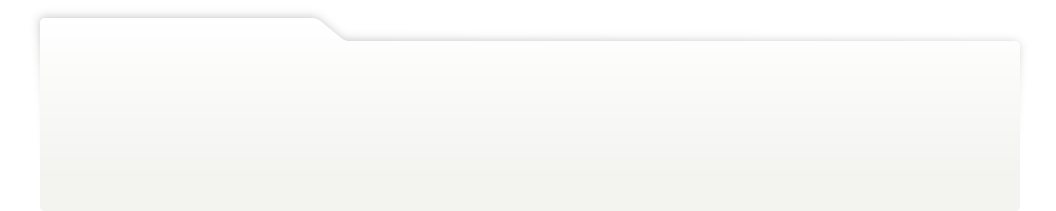
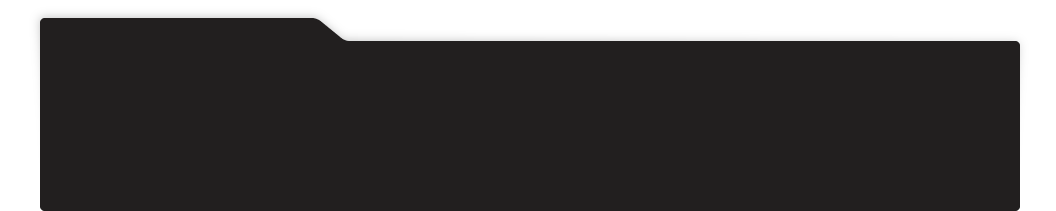
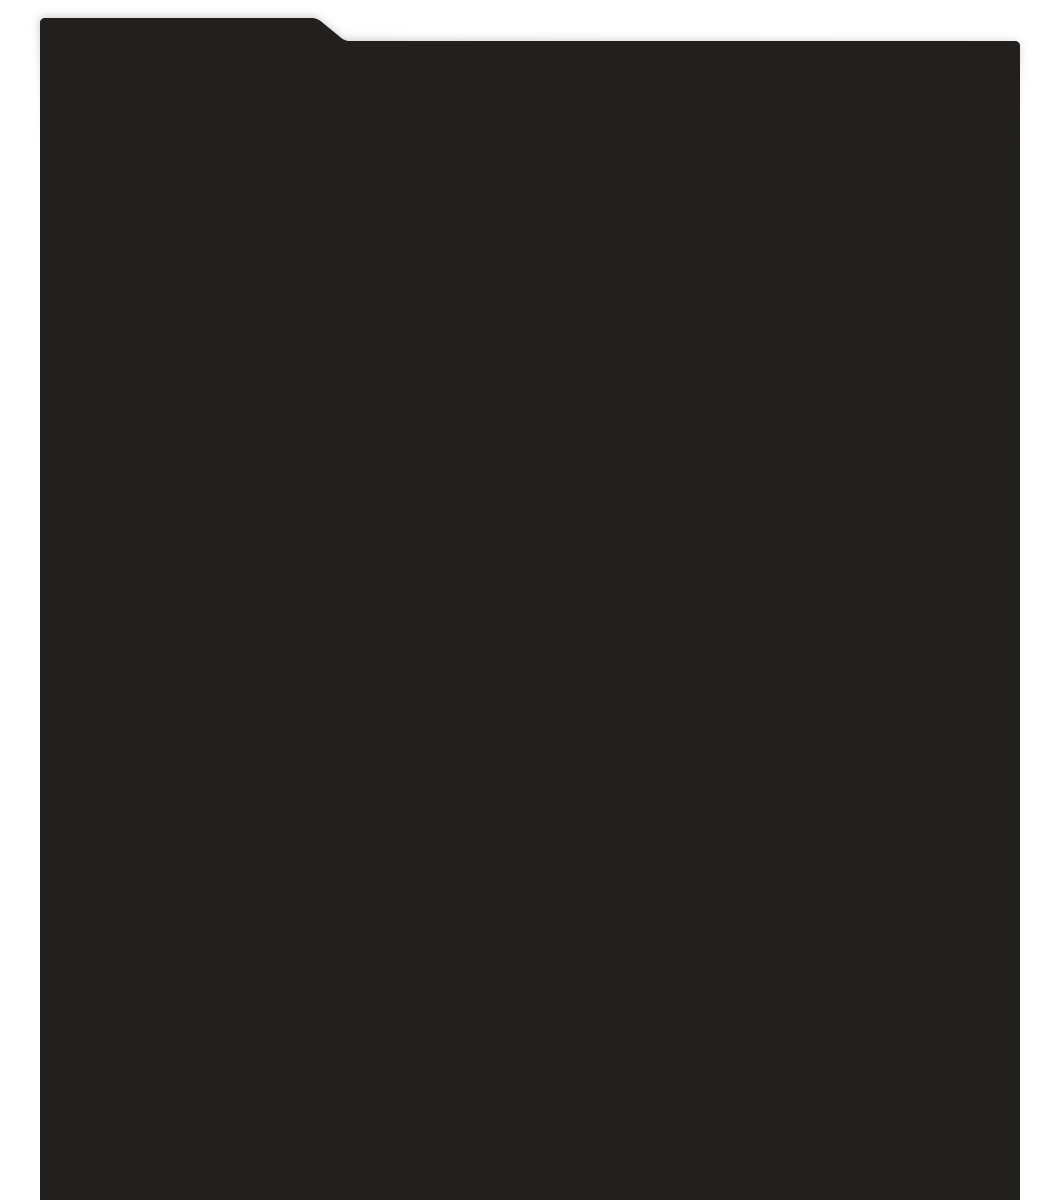
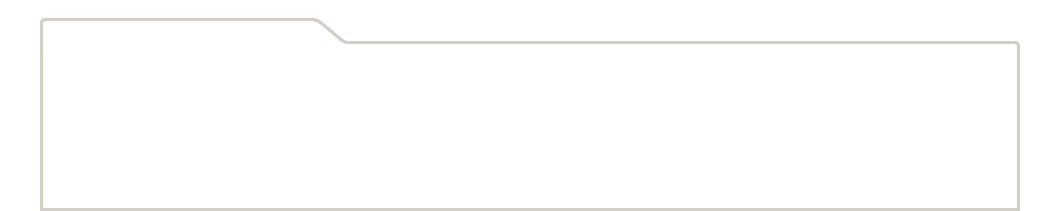
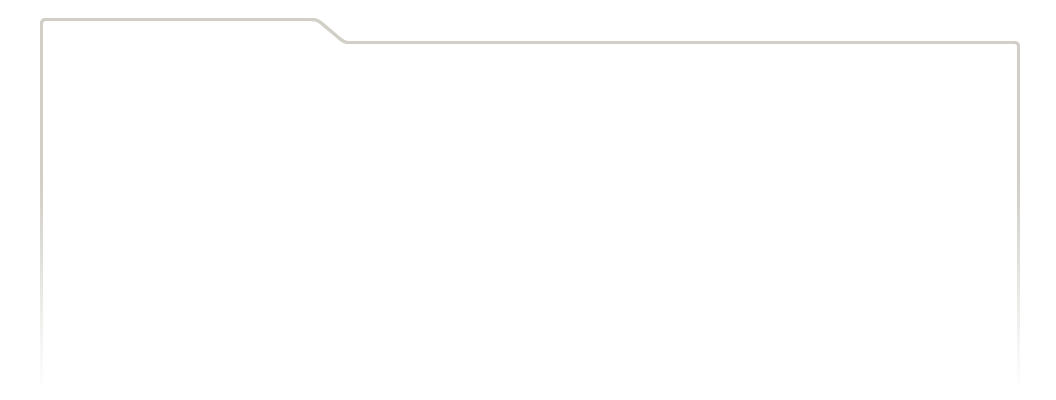
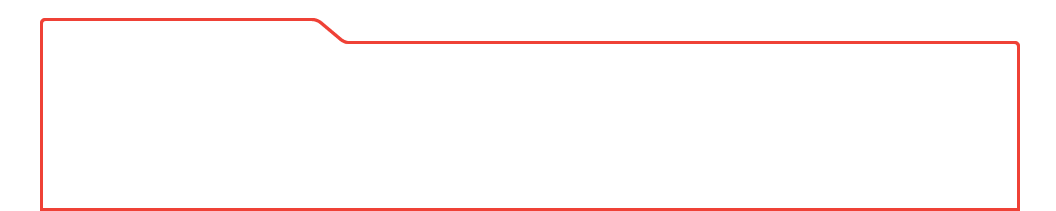
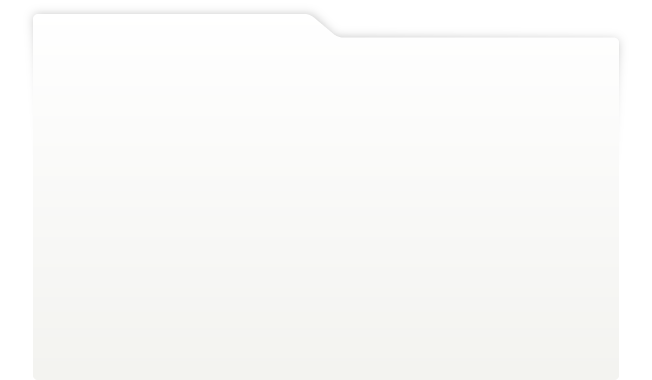
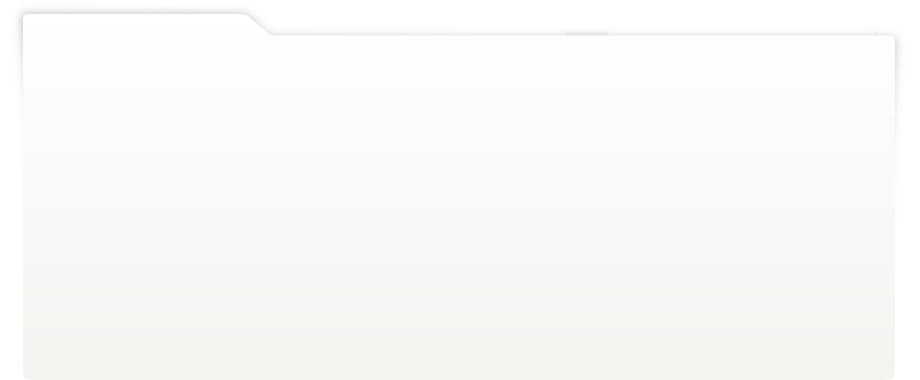
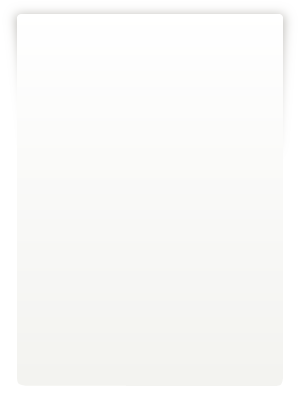
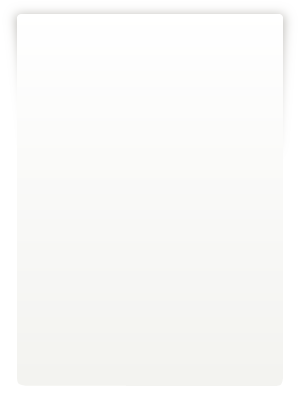
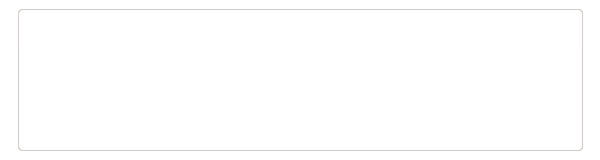
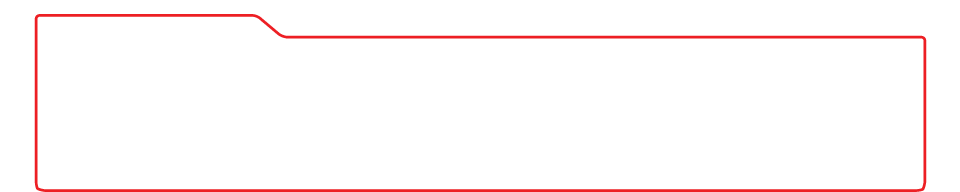
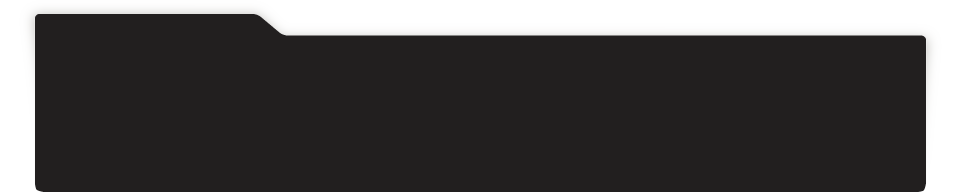
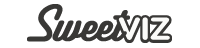
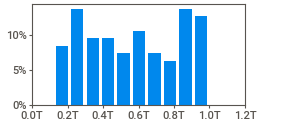
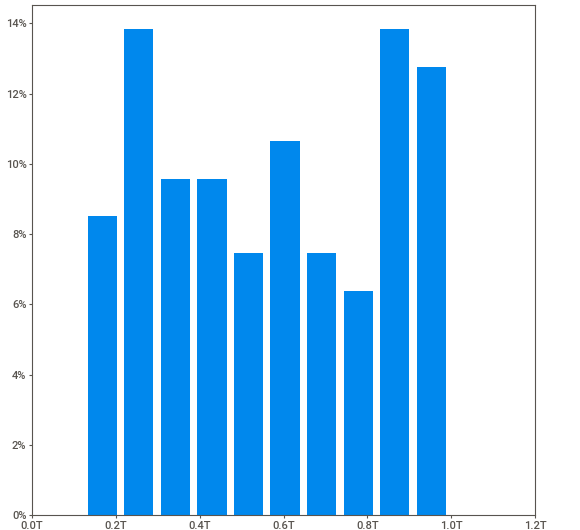
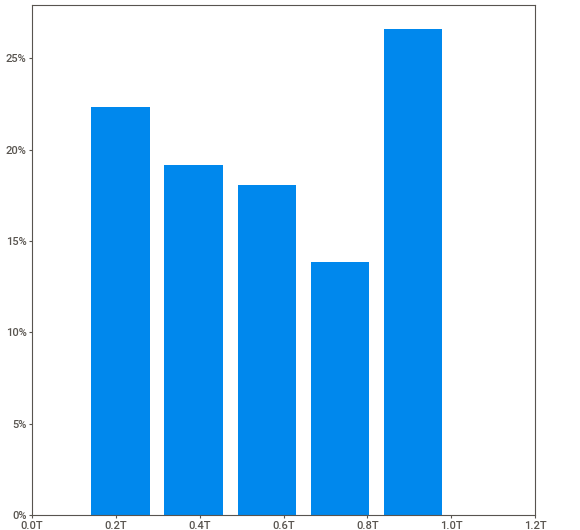
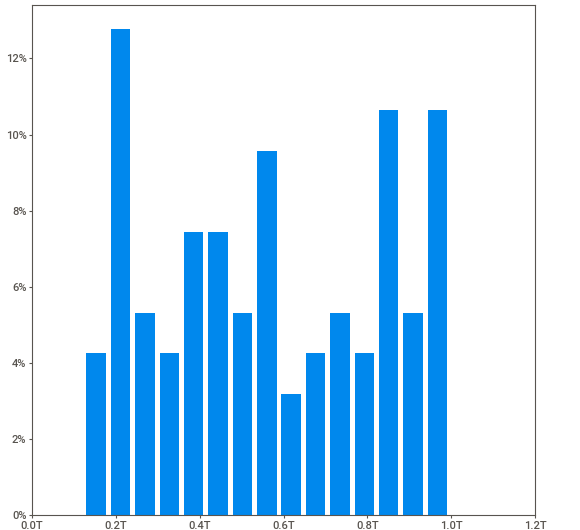
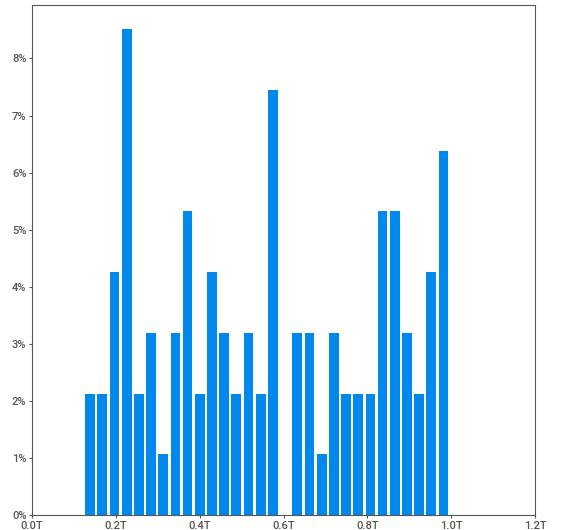
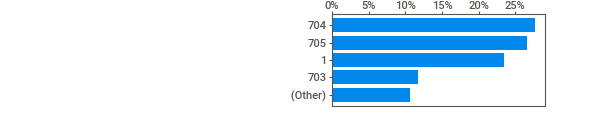
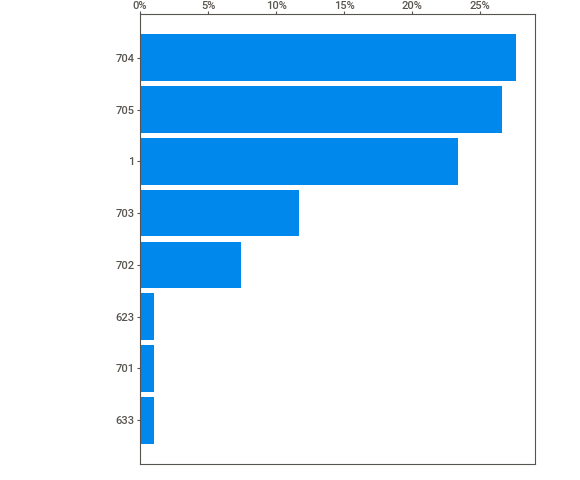
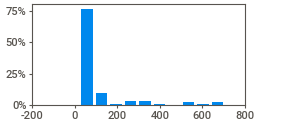
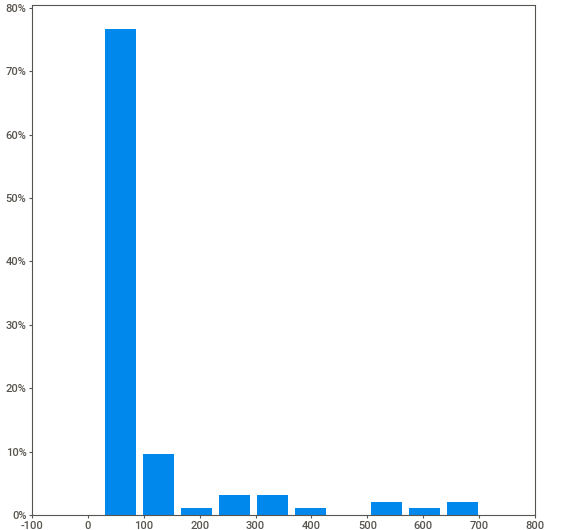
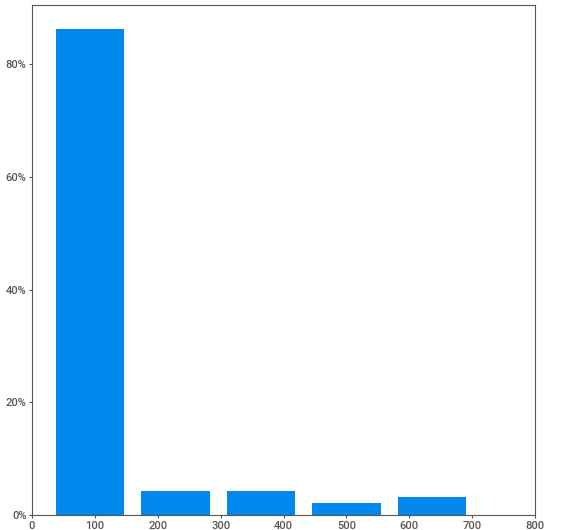
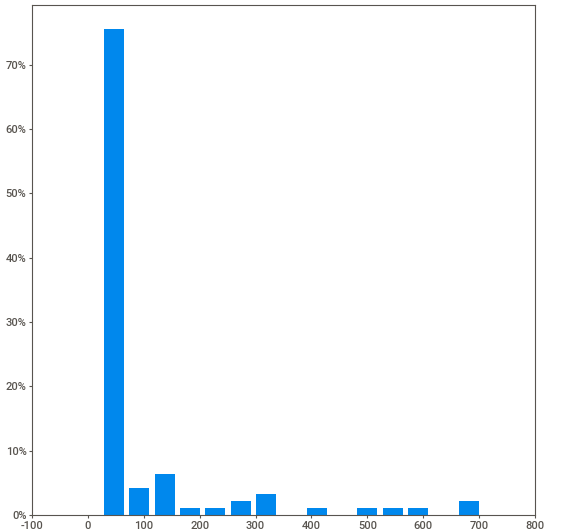
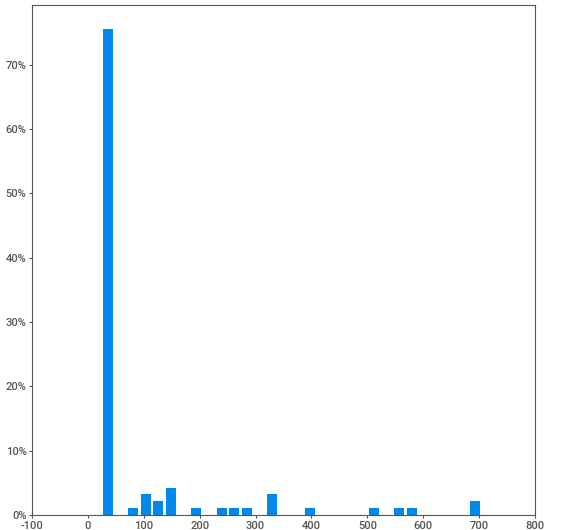
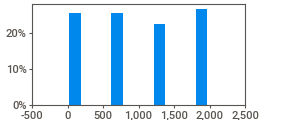
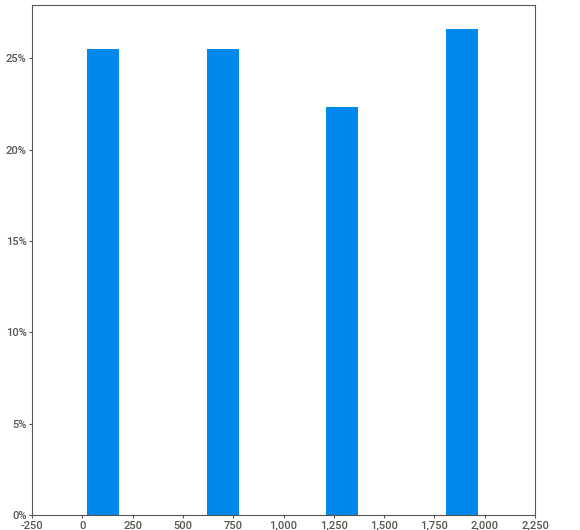
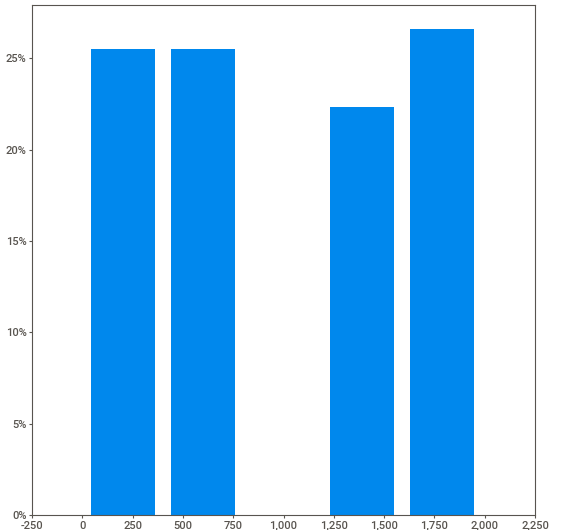
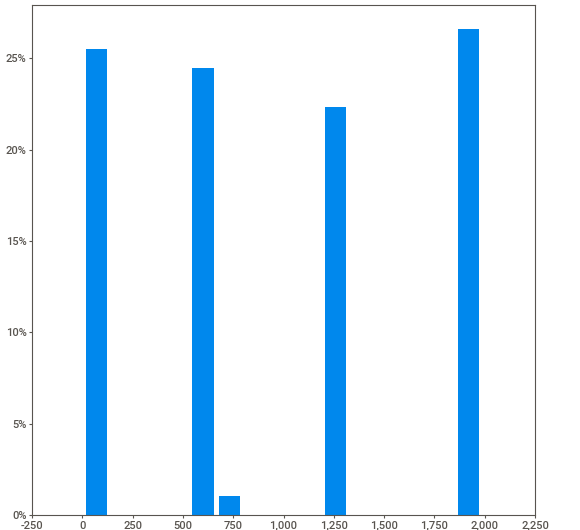
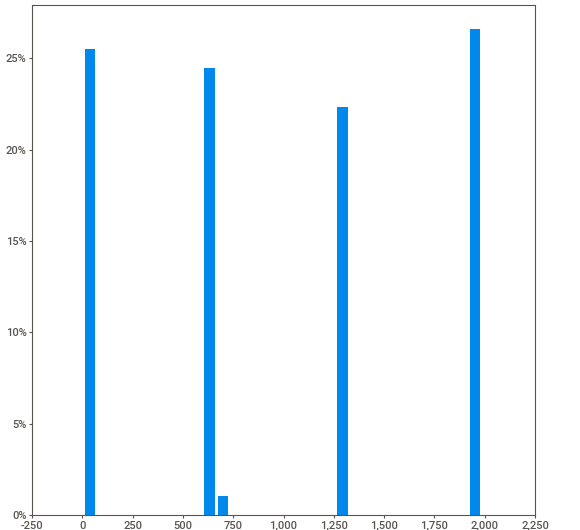
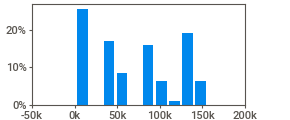
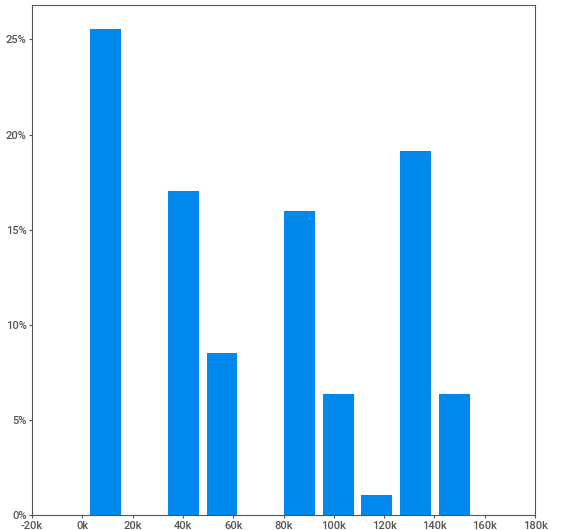
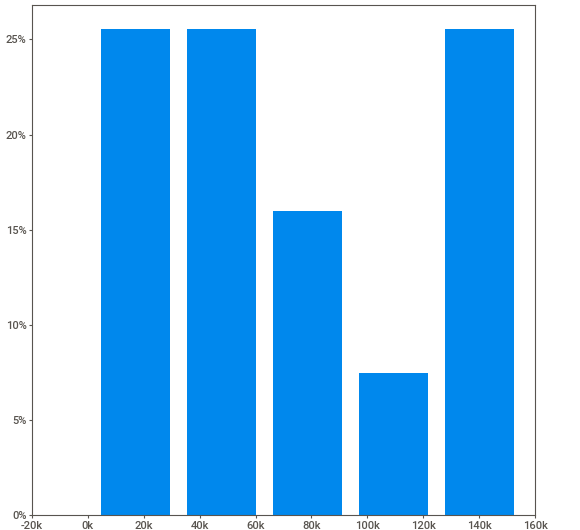
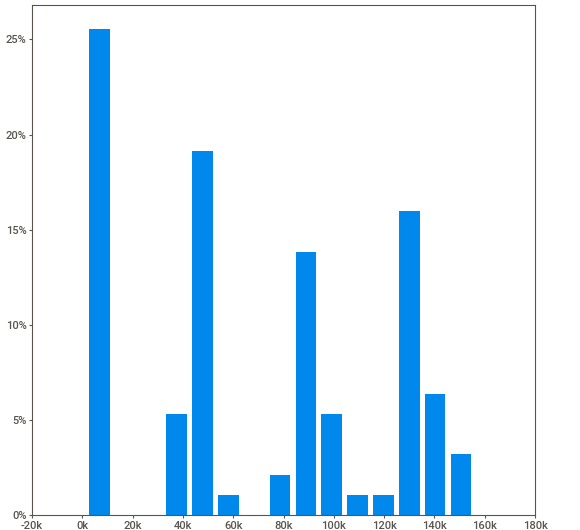
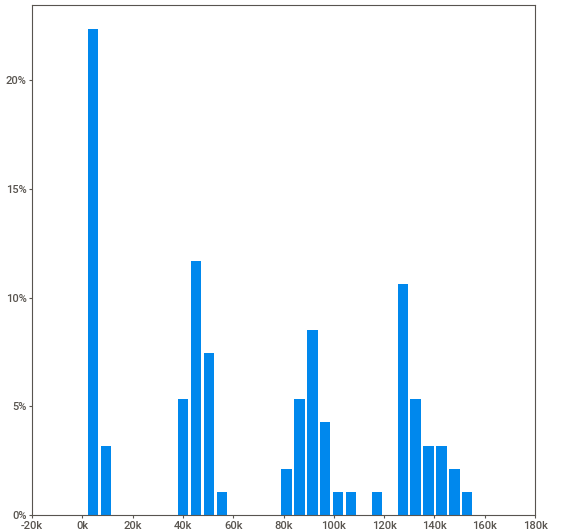
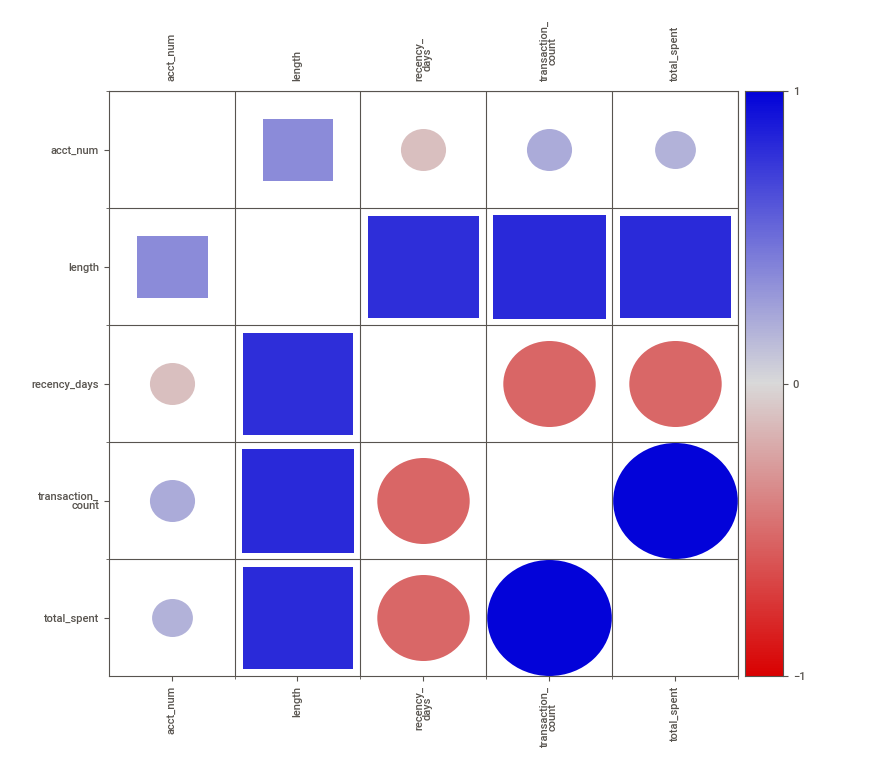
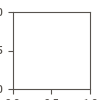

In [ ]:
import sweetviz as sv

# Generate the Sweetviz report
report = sv.analyze(lrfm_df)

# Display the report directly in the notebook
report.show_notebook()

# K-means Clustering

In [ ]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
lrfm_df.head()

,acct_num,length,recency_days,transaction_count,total_spent
0,124000000000,705,24,1950,128213.47
1,138000000000,1,401,6,3932.55
2,169000000000,1,141,9,2814.60
3,170000000000,705,24,1956,137459.29
4,201000000000,704,25,662,48026.33


## Scale data

In [ ]:
scaler = StandardScaler()
lrfm_scaled = scaler.fit_transform(lrfm_df[['length','recency_days', 'transaction_count', 'total_spent']])
lrfm_scaled_df = pd.DataFrame(lrfm_scaled, columns=['length','recency_days', 'transaction_count', 'total_spent'])
# lrfm_scaled_df['acct_num'] = lrfm_df['acct_num']
lrfm_scaled_df.head()

,length,recency_days,transaction_count,total_spent
0,0.563010,-0.444845,1.308921,1.197433
1,-1.807830,2.106032,-1.323325,-1.317635
2,-1.807830,0.346806,-1.319263,-1.340259
3,0.563010,-0.444845,1.317045,1.384540
4,0.559642,-0.438079,-0.435078,-0.425311


<Axes: >

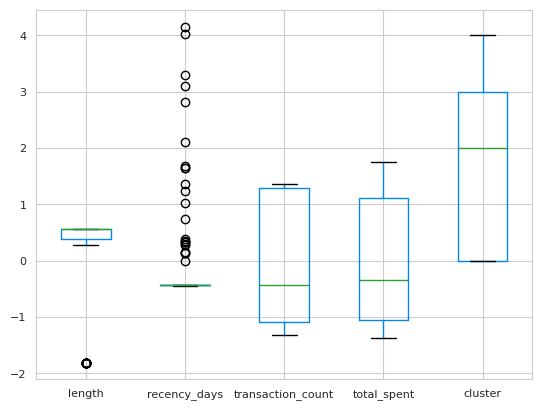

In [ ]:
lrfm_scaled_df.boxplot()

## Applying k-means clustering

In [ ]:
def run_kmeans(k, scaled_data):
  kmeans = KMeans(
        init="random",
        n_clusters=k,
        # n_init=10,
        # max_iter=300,
        random_state=42
        )
  kmeans.fit(scaled_data)
  return kmeans.inertia_,kmeans.labels_,kmeans.cluster_centers_

In [ ]:
# Create function to run clustering across a range
def optimize_kmeans(cluster_range=None, scaled_data=None):
  # Initialize clustering
  inertias = []
  labels = []
  silhouette_values = []
  for n_clusters in cluster_range:
    inertia, label_vals, centroids = run_kmeans(n_clusters, scaled_data)

    # Print inertia
    print(f"n_clusters = {n_clusters}: inertia = {inertia:.2f}")
    inertias.append(inertia)
    labels.append(label_vals)

    # Compute silhouette score
    silhouette = silhouette_score(scaled_data, label_vals)
    silhouette_values.append(silhouette)

  return inertias, labels, silhouette_values

In [ ]:
# Test clustering for clusters 2-11
clusters = range(2,11)
inertia_values, labels, silhouette_values = optimize_kmeans(
    cluster_range = clusters,
    scaled_data=lrfm_scaled_df
)

n_clusters = 2: inertia = 209.40
n_clusters = 3: inertia = 86.12
n_clusters = 4: inertia = 41.06
n_clusters = 5: inertia = 12.40
n_clusters = 6: inertia = 9.53
n_clusters = 7: inertia = 7.54
n_clusters = 8: inertia = 4.75
n_clusters = 9: inertia = 4.74
n_clusters = 10: inertia = 4.56


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

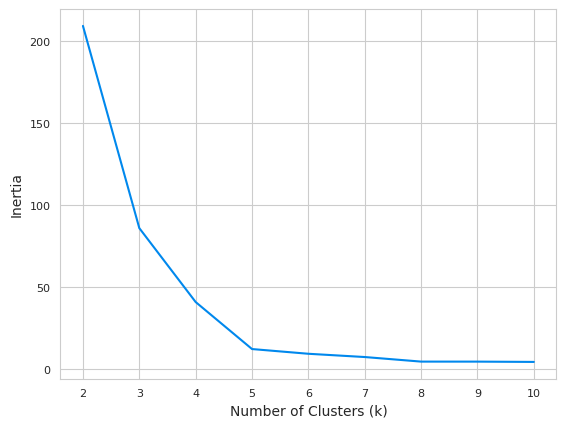

In [ ]:
plt.plot(clusters, inertia_values)
plt.xticks(clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

# elbow method is sa lahat

Text(0, 0.5, 'Silhouette')

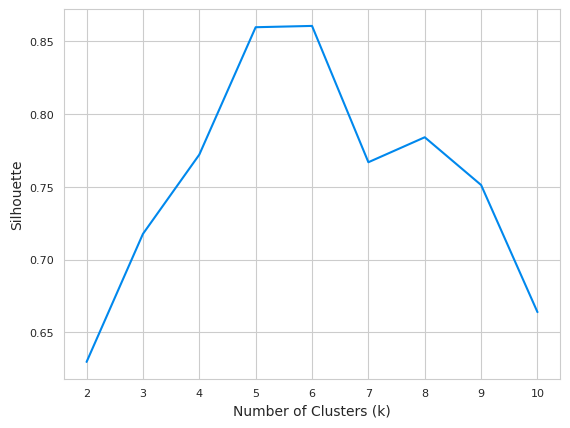

In [ ]:
plt.plot(clusters, silhouette_values)
plt.xticks(clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette")

# silhouette shows how consistent within each cluster
# outliers were included

In [ ]:
# Apply optimal k = 5
inertia, labels, centroids = run_kmeans(
    k=5,
    scaled_data=lrfm_scaled_df
)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Append labels to original data and scaled data
lrfm_df['cluster'] = labels
lrfm_scaled_df['cluster'] = labels

lrfm_df.head()

# Recency vs cluster
# Frequency vs cluster

,acct_num,length,recency_days,transaction_count,total_spent,cluster,cluster_number
0,124000000000,705,24,1950,128213.47,0,1
1,138000000000,1,401,6,3932.55,2,5
2,169000000000,1,141,9,2814.60,4,4
3,170000000000,705,24,1956,137459.29,0,1
4,201000000000,704,25,662,48026.33,3,3


In [ ]:
# Cluster 4 (value 3) >>> 1
# Cluster 1 (value 0) >>> 2
# Cluster 3 (value 2) >>> 3
# Cluster 2 (value 1) >>> 4
# Cluster 5 (value 4) >>> 5

def get_cluster(cluster_value):
  if cluster_value == 0:
    return 1
  elif cluster_value == 1:
    return 2
  elif cluster_value == 2:
    return 5
  elif cluster_value == 3:
    return 3
  elif cluster_value == 4:
    return 4
  else:
    return 'Out of range'

lrfm_df['cluster_number'] = lrfm_df['cluster'].apply(get_cluster)

<ipython-input-233-0d9424b353aa>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = plt.cm.get_cmap('viridis', 5)


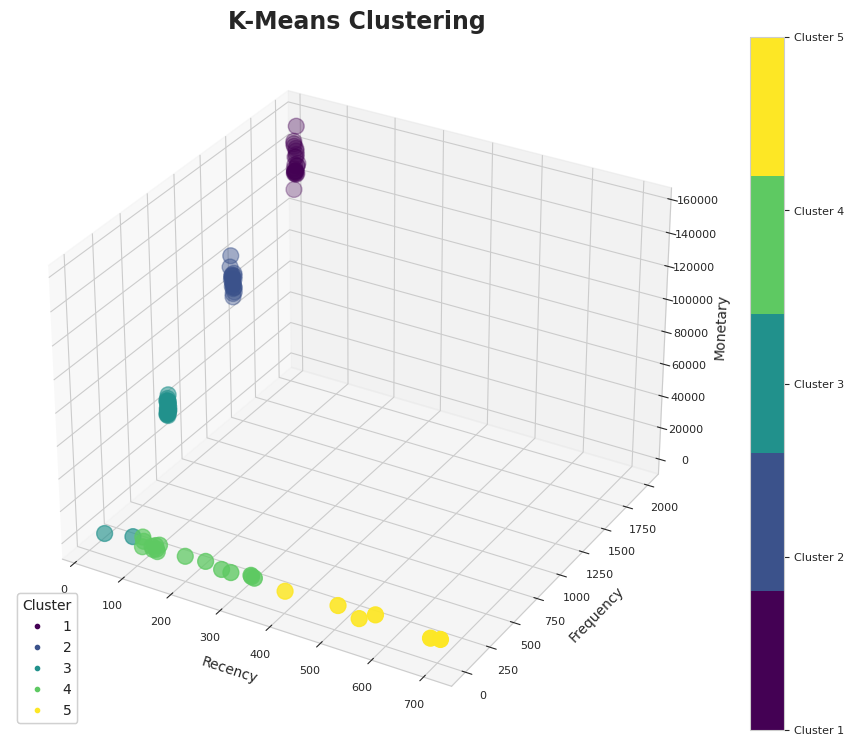

In [ ]:
# Set style
sns.set_style('whitegrid')
fig = plt.figure(figsize=(12, 9))

# Create custom colormap
my_cmap = plt.cm.get_cmap('viridis', 5)

# Create 3D scatter plot
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    lrfm_df['recency_days'],
    lrfm_df['transaction_count'],
    lrfm_df['total_spent'],
    c=lrfm_df['cluster_number'],
    s=130,
    cmap=my_cmap)

# Add legend
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
ax.add_artist(legend1)

# Set the colorbar to show cluster labels
cbar = plt.colorbar(scatter)
cbar.set_ticks(np.arange(1, 6))
cbar.set_ticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])

# Set axis labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('K-Means Clustering', fontsize=17, fontweight='bold')

# # Plot centroids
# centroids = centroids
# ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=300, linewidths=3, color='black', zorder=10)

# Display
plt.show()

<ipython-input-234-f5cbc4db98e7>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = plt.cm.get_cmap('viridis', 5)


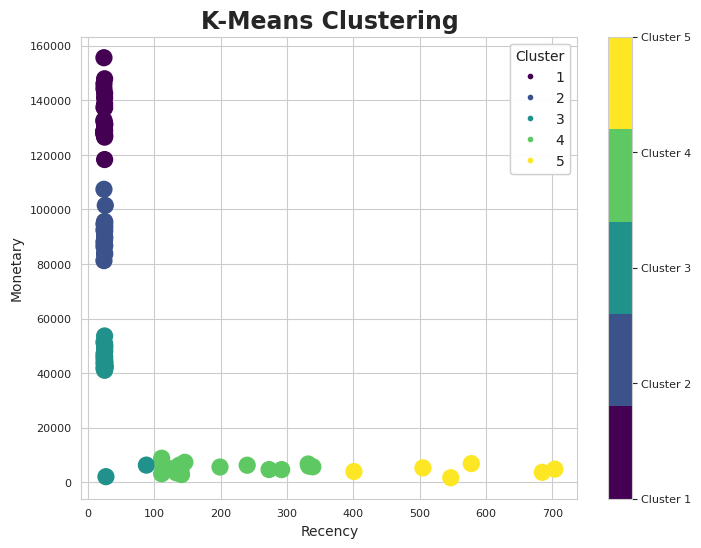

In [ ]:
# Set style
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8, 6))

# Create custom colormap
my_cmap = plt.cm.get_cmap('viridis', 5)

# Create 3D scatter plot
ax = fig.add_subplot(111)
scatter = ax.scatter(
    lrfm_df['recency_days'],
    lrfm_df['total_spent'],
    c=lrfm_df['cluster_number'],
    s=130,
    cmap=my_cmap)

# Add legend
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster")
ax.add_artist(legend1)

# Set the colorbar to show cluster labels
cbar = plt.colorbar(scatter)
cbar.set_ticks(np.arange(1, 6))
cbar.set_ticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])

# Set axis labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_title('K-Means Clustering', fontsize=17, fontweight='bold')

# Display
plt.show()

In [ ]:
cluster_profile = lrfm_df.groupby('cluster').agg({
    'length': 'mean',
    'recency_days': 'mean',
    'transaction_count': 'mean',
    'total_spent': 'mean',
    'acct_num': 'count'
}).reset_index()
cluster_profile.columns = ['cluster', 'avg_length', 'avg_recency_days', 'avg_transaction_count', 'avg_total_spent', 'customer_count']
cluster_profile

# EDA per cluster
## describe age/generation, jobs, shopping categories, gender, holiday spending

,cluster,avg_length,avg_recency_days,avg_transaction_count,avg_total_spent,customer_count
0,0,704.160000,24.520000,1957.600000,133899.049200,25
1,1,704.000000,24.761905,1309.380952,91383.461905,21
2,2,1.000000,570.000000,8.333333,4350.768333,6
3,3,697.884615,27.346154,607.884615,42704.701538,26
4,4,1.000000,198.250000,8.750000,5442.205625,16


In [ ]:
df

,cc_num,gender,city,city_pop,job,dob,acct_num,trans_num,unix_time,category,amt,trans_datetime,age,time_of_day,season,is_holiday,age_bin,trans_date
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,1958-12-12,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31,63.055441,afternoon,Dry,n,Baby Boomers,2020-02-10
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",1970-08-31,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28,51.337440,afternoon,Dry,n,Gen X,2020-05-31
2,4.140000e+18,M,Calapan,133893,Financial controller,1953-07-23,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37,68.443532,afternoon,Dry,n,Baby Boomers,2020-03-29
3,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,1954-01-11,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59,67.972621,afternoon,Rainy,n,Baby Boomers,2020-09-28
4,3.530000e+15,M,City of Paranaque,665822,"Engineer, water",1961-07-31,540000000000,b389cc449c9c298e8c004024449f7a27,1594960430,shopping_net,363.49,2020-07-17 12:33:50,60.421629,afternoon,Rainy,n,Baby Boomers,2020-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92427,3.530000e+15,M,Dasmarinas,659019,"Physicist, medical",1965-03-26,201000000000,4f77498d91283c4910a636b2e8149dda,1587273415,misc_pos,6.54,2020-04-19 13:16:55,56.769336,afternoon,Dry,n,Gen X,2020-04-19
92428,2.470000e+15,M,San Fernando,306659,"Surveyor, quantity",1935-11-01,581100000000,d44f411eabd406a76a60546e723a98fd,1628185569,kids_pets,98.23,2021-08-06 01:46:09,86.168378,morning,Rainy,n,The Silent Generation,2021-08-06
92429,3.520000e+15,M,Masbate,95389,Wellsite geologist,1967-11-20,531000000000,7e767a74cae901c13f1a9d1d37aa63d4,1621481285,grocery_pos,78.79,2021-05-20 11:28:05,54.116359,morning,Dry,n,Gen X,2021-05-20
92430,4.620000e+15,M,San Fernando,121812,Personnel officer,1934-11-20,555000000000,6ced184c93e66028e8d235ad3060de90,1625341374,personal_care,31.37,2021-07-04 03:42:54,87.115674,morning,Rainy,n,The Silent Generation,2021-07-04


In [ ]:
lrfm_df.head()

,acct_num,length,recency_days,transaction_count,total_spent,cluster,cluster_number
0,124000000000,705,24,1950,128213.47,0,1
1,138000000000,1,401,6,3932.55,2,5
2,169000000000,1,141,9,2814.60,4,4
3,170000000000,705,24,1956,137459.29,0,1
4,201000000000,704,25,662,48026.33,3,3


In [ ]:
# Combine LRFM features into a single DataFrame
lrfm_cluster_df = pd.merge(lrfm_df, df, on='acct_num')

In [ ]:
lrfm_cluster_df

,acct_num,length,recency_days,transaction_count,total_spent,cluster,cluster_number,cc_num,gender,city,...,unix_time,category,amt,trans_datetime,age,time_of_day,season,is_holiday,age_bin,trans_date
0,124000000000,705,24,1950,128213.47,0,1,1.800000e+14,M,Calapan,...,1588643875,gas_transport,76.78,2020-05-05 09:57:55,72.073922,morning,Dry,n,Baby Boomers,2020-05-05
1,124000000000,705,24,1950,128213.47,0,1,1.800000e+14,M,Calapan,...,1592457140,shopping_pos,5.40,2020-06-18 13:12:20,72.073922,afternoon,Rainy,n,Baby Boomers,2020-06-18
2,124000000000,705,24,1950,128213.47,0,1,1.800000e+14,M,Calapan,...,1578552118,gas_transport,61.75,2020-01-09 14:41:58,72.073922,afternoon,Dry,n,Baby Boomers,2020-01-09
3,124000000000,705,24,1950,128213.47,0,1,1.800000e+14,M,Calapan,...,1617151857,grocery_pos,62.59,2021-03-31 08:50:57,72.073922,morning,Dry,n,Baby Boomers,2021-03-31
4,124000000000,705,24,1950,128213.47,0,1,1.800000e+14,M,Calapan,...,1617330744,NaN,2.39,2021-04-02 10:32:24,72.073922,morning,Dry,n,Baby Boomers,2021-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92427,996400000000,702,25,1961,142617.61,0,1,4.890000e+12,M,Dumaguete City,...,1588999115,shopping_net,7.35,2020-05-09 12:38:35,80.629706,afternoon,Dry,n,The Silent Generation,2020-05-09
92428,996400000000,702,25,1961,142617.61,0,1,4.890000e+12,M,Dumaguete City,...,1624663368,home,20.31,2021-06-26 07:22:48,80.629706,morning,Rainy,n,The Silent Generation,2021-06-26
92429,996400000000,702,25,1961,142617.61,0,1,4.890000e+12,M,Dumaguete City,...,1630343780,health_fitness,54.59,2021-08-31 01:16:20,80.629706,morning,Rainy,n,The Silent Generation,2021-08-31
92430,996400000000,702,25,1961,142617.61,0,1,4.890000e+12,M,Dumaguete City,...,1604536332,shopping_pos,6.16,2020-11-05 08:32:12,80.629706,morning,Rainy,n,The Silent Generation,2020-11-05


In [ ]:
lrfm_cluster_df.groupby('cluster_number')['acct_num'].count().to_frame()

,acct_num
cluster_number,
1,48940
2,27497
3,15805
4,140
5,50


In [ ]:
lrfm_cluster_df.to_csv('Data/cc_cluster.csv',index=False)

# Linear Regression within Cluster

In [ ]:
# When we try to predict their behavior (spending), highly correlated yung features within the cluster, which supports the clustering done

cluster_2_df = lrfm_cluster_df[lrfm_cluster_df['cluster_number'] == ]